#                                                  EDA

# IMPORTING  ALL  LIBRARY

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# COLLECTING DATA

In [31]:
df=pd.read_csv("C:\\Users\\Gunja\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv")

In [32]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# FEATURES OF DATA

In [33]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

# Description of features: 
Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
1.day: Day of Weather data observations
2.month: Month of Weather data observations
3.yar: Year of Weather data observations
4. Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
5. RH : Relative Humidity in %: 21 to 90
6. Ws :Wind speed in km/h: 6 to 29
7. Rain: total day in mm: 0 to 16.8
FWI Components
8. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
9. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
10. Drought Code (DC) index from the FWI system: 7 to 220.4
11. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
12. Buildup Index (BUI) index from the FWI system: 1.1 to 68
13. Fire Weather Index (FWI) Index: 0 to 31.1
14. Classes: two classes, namely not fire or fire

In [34]:
df.shape

(247, 14)

#  Datatype  of  Features  

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# ALL features datatypes is object

# Statiscal Description about features

In [36]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


# Here, std of rain,fwi is greater than mean.There should be some outliers.

# Here not much missing value.So delete the nan value

In [37]:
df.dropna(inplace=True)

# IN the dataset  of regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region.So, on converting float i am getting some strings on index 124.

In [38]:
df[df.day=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [39]:
df.drop(index=124,inplace=True,axis=0)

In [40]:
df['date']=df['day'].str.cat(['/']*243)+df['month'].str.cat(['/']*243)+df['year'].str.cat(['/']*243)
df.drop(columns=['day','month','year'],inplace=True)
for i in df.columns[:10]:
    df[i]=df[i].astype(float)
df['Classes  ']=df['Classes  '].str.strip().map({'not fire':0,'fire':1})    
 

# Now convert the features into float

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1    RH          243 non-null    float64
 2    Ws          243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  date         243 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 24.7+ KB


In [21]:
df.iloc[:12,:]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,2012-01-06
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,2012-02-06
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,2012-03-06
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,2012-04-06
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,2012-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...
118,31.0,66.0,11.0,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,2012-09-27
119,32.0,47.0,14.0,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,2012-09-28
120,26.0,80.0,16.0,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,2012-09-29
121,25.0,78.0,14.0,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,2012-09-30


<AxesSubplot:>

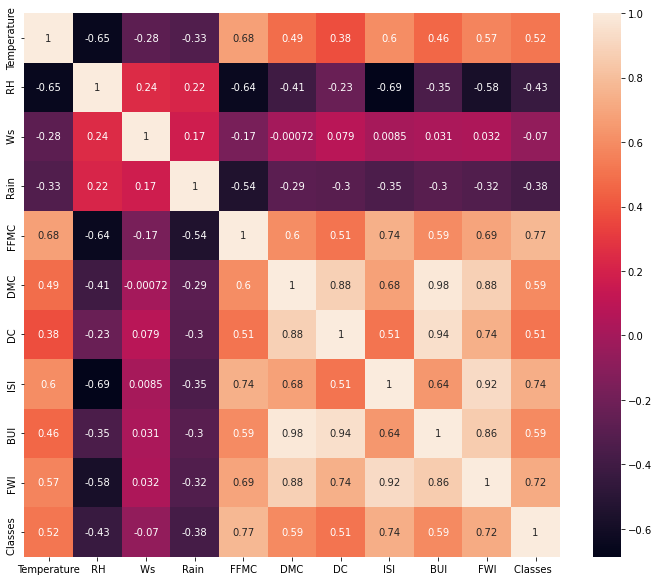

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
directly=[]
for i in range(len(df.columns)-2):
    for j in range(1,len(df.columns)-i-2):
        if df[[df.columns[i],df.columns[i+j]]].corr().iloc[0,1]>=0.6:
            directly.append([df.columns[i],df.columns[i+j]])
inversely=[]
for i in range(len(df.columns)-2):
    for j in range(1,len(df.columns)-i-2):
        if df[[df.columns[i],df.columns[i+j]]].corr().iloc[0,1]<=-0.6:
            inversely.append([df.columns[i],df.columns[i+j]])            

# Many attributes are highly correlated 

In [15]:
directly

[['Temperature', 'FFMC'],
 ['Temperature', 'ISI'],
 ['FFMC', 'DMC'],
 ['FFMC', 'ISI'],
 ['FFMC', 'FWI'],
 ['DMC', 'DC'],
 ['DMC', 'ISI'],
 ['DMC', 'BUI'],
 ['DMC', 'FWI'],
 ['DC', 'BUI'],
 ['DC', 'FWI'],
 ['ISI', 'BUI'],
 ['ISI', 'FWI'],
 ['BUI', 'FWI']]

C:\Users\Gunja\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


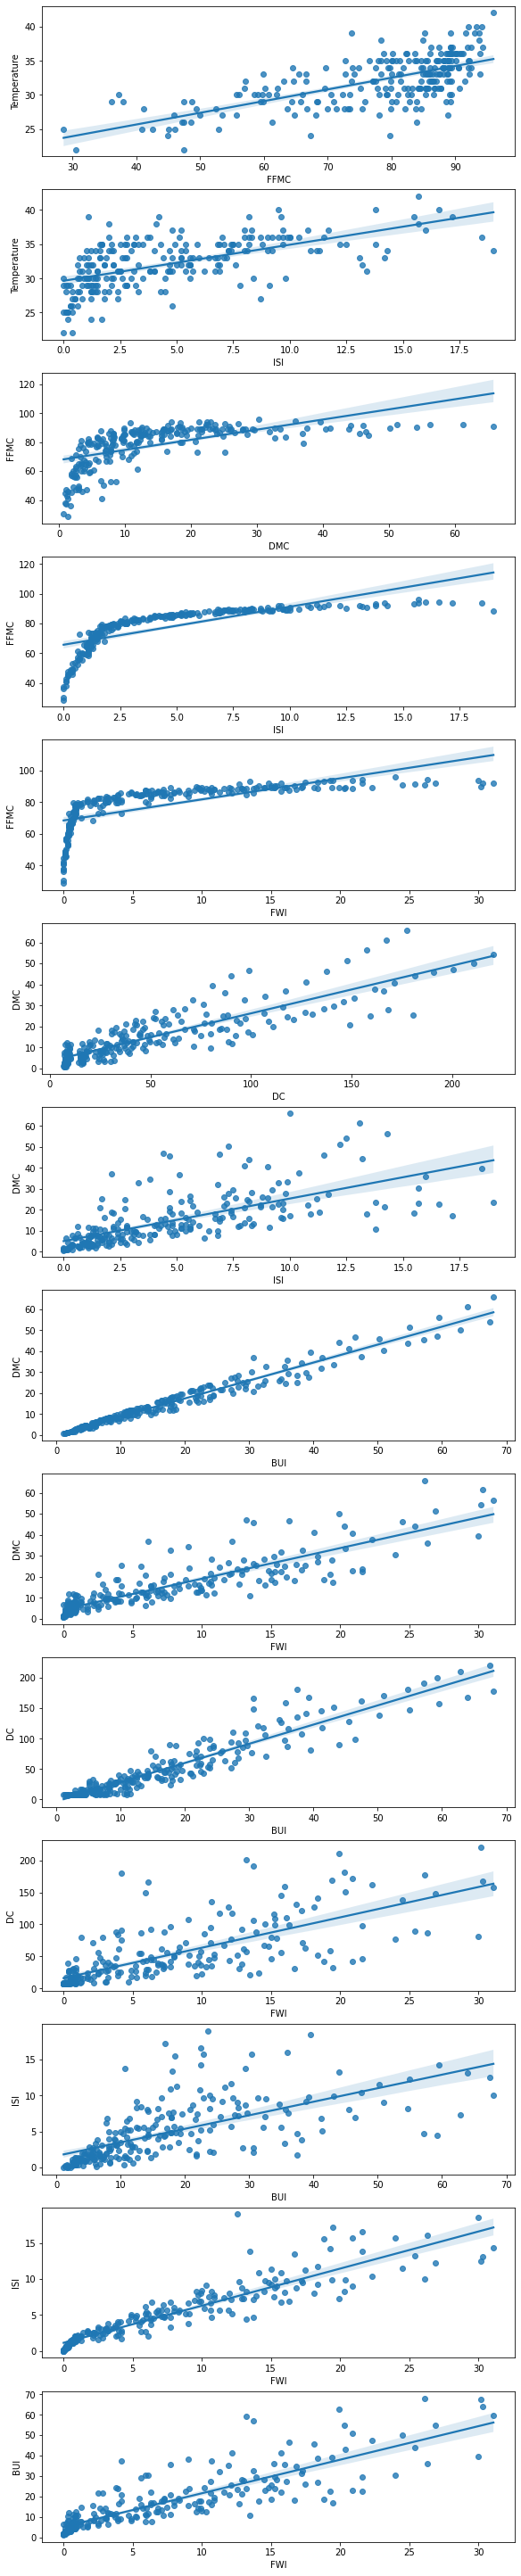

In [16]:
fig,ax=plt.subplots(14,figsize=(8,40),constrained_layout=True)

for i in range(14):
    sns.regplot(df[[directly[i][1]]],df[[directly[i][0]]],ax=ax[i])
     
    
    

In [17]:
inversely

[['Temperature', ' RH'], [' RH', 'FFMC'], [' RH', 'ISI']]

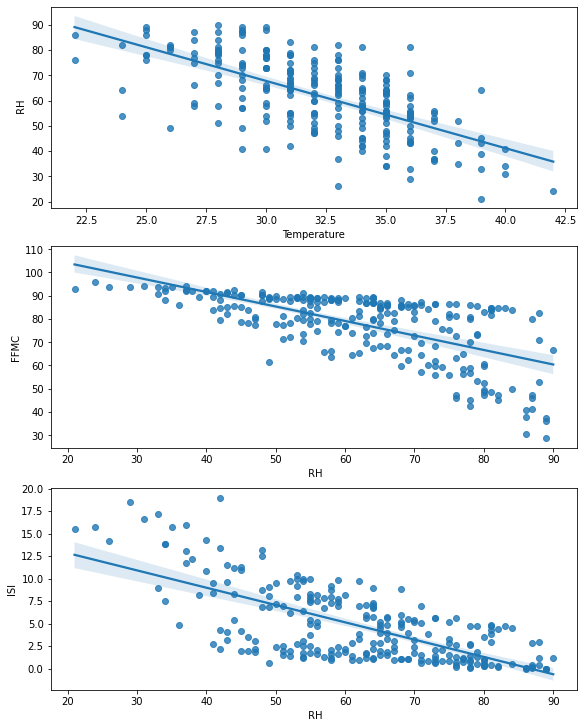

In [18]:
fig,ax=plt.subplots(3,figsize=(8,10),constrained_layout=True)

for i in range(3):
    sns.regplot(df[[inversely[i][0]]],df[[inversely[i][1]]],ax=ax[i])
     

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns[1:-2]
  
# calculating VIF for each feature
vif_data["VIF"] = [ variance_inflation_factor(df.iloc[:,1:-2].values, i) for i in range(len(df.columns)-3)]

In [21]:
vif_data

,feature,VIF
0,RH,28.262811
1,Ws,34.624610
2,Rain,1.524634
3,FFMC,40.395380
4,DMC,178.899269
5,DC,50.990214
6,ISI,52.237903
7,BUI,396.170046
8,FWI,76.200330


# Checking outliers

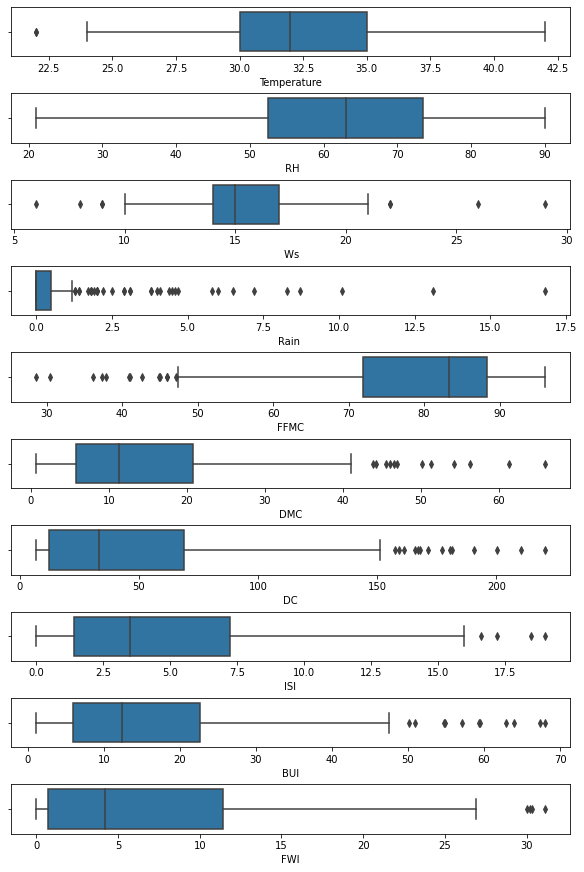

In [22]:
fig,ax=plt.subplots(10,figsize=(8,12),constrained_layout=True)

for i in range(10):
    sns.boxplot(data=df,x=df.columns[i],ax=ax[i])
    

# BUI,FWI,DC,DMC,Rain,FFMC,ISI features have some outliers.

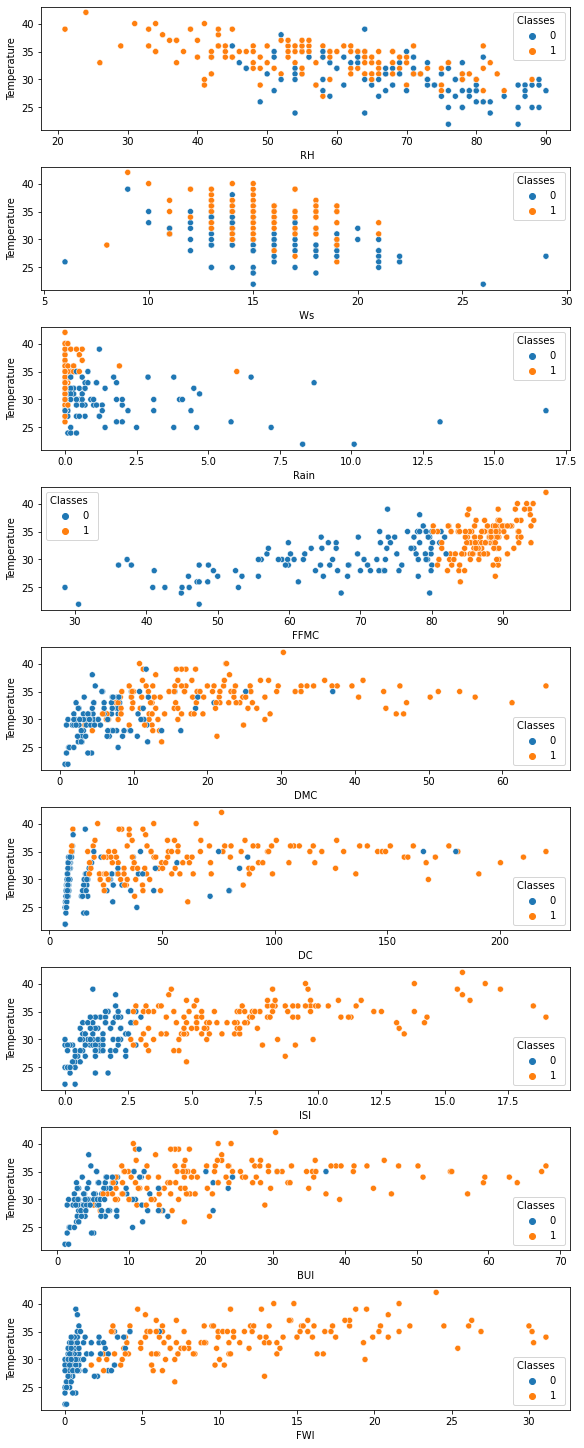

In [23]:
fig,ax=plt.subplots(9,figsize=(8,20),constrained_layout=True)
count=0
for i in df.columns[1:-2]:
    sns.scatterplot(x=i,y="Temperature",data=df,ax=ax[count],hue='Classes  ')
    count+=1
     

# In this graphs ISI(about 2.5),FWI(about 3 ),BUI(about 10),features showing that after some range there is very high chances of  fire.Rain feature shows at 0 there is very high chances of fire.FFMC feature shows above 80 there is very high chances of fire.

C:\Users\Gunja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

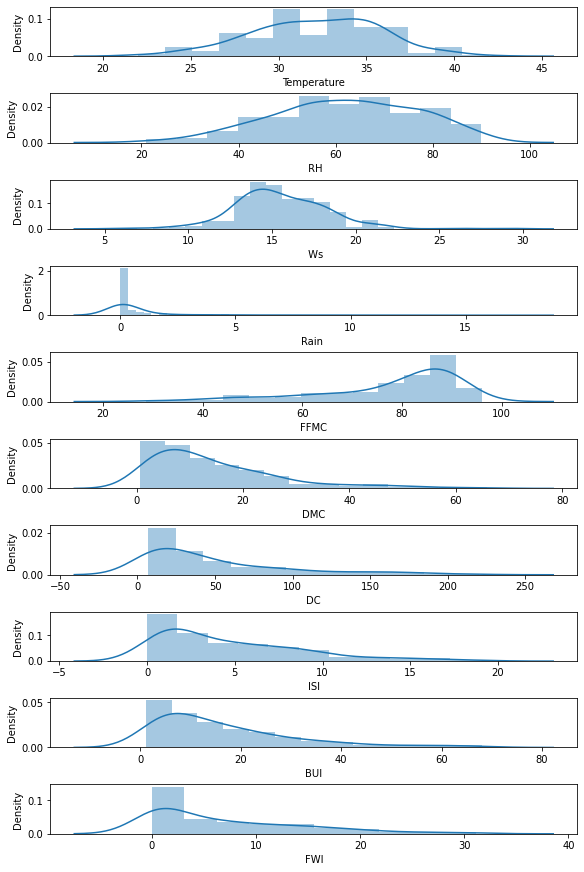

In [24]:
fig,ax=plt.subplots(10,figsize=(8,12),constrained_layout=True)

for i in range(10):
    sns.distplot(df[[df.columns[i]]],ax=ax[i],axlabel=df.columns[i])

# Here features are not in Normal distribution.

# checking for data imbalance

In [25]:
df["Classes  "].value_counts()

1    137
0    106
Name: Classes  , dtype: int64

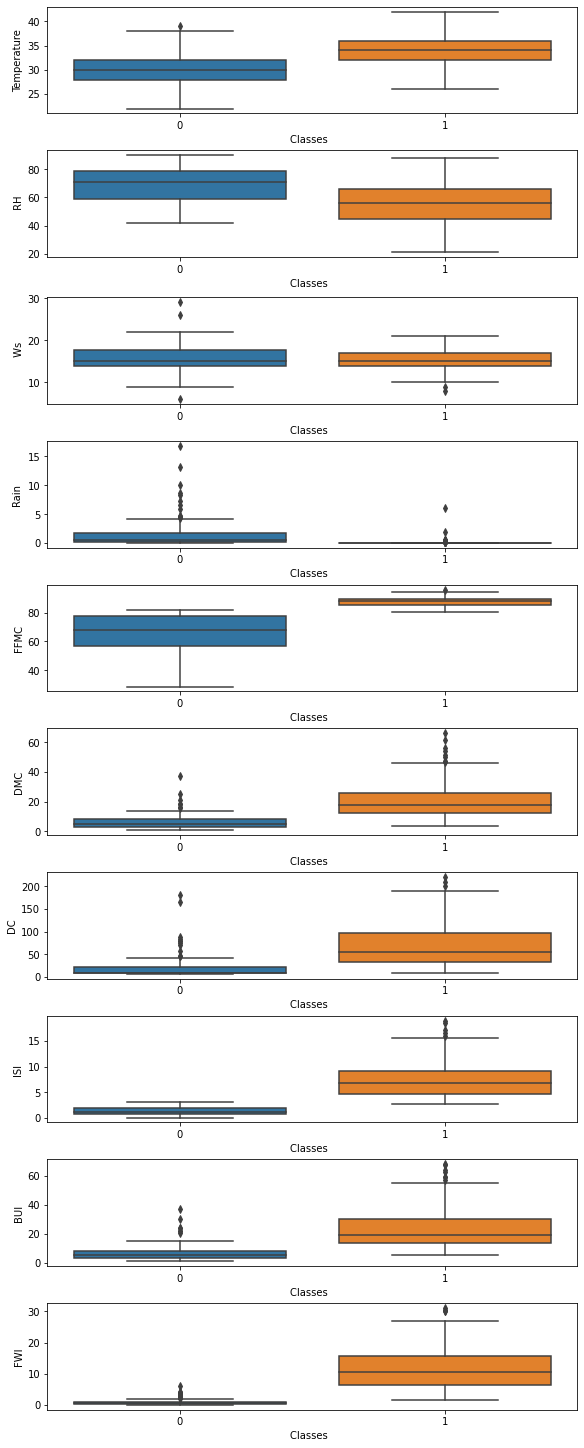

In [26]:
count=0
fig,ax=plt.subplots(10,figsize=(8,20),constrained_layout=True)
for i in df.columns[:-2]:
    sns.boxplot(data=df,x="Classes  ",y=i,ax=ax[count])
    count+=1

<AxesSubplot:title={'center':'bejaia'}, xlabel='date'>

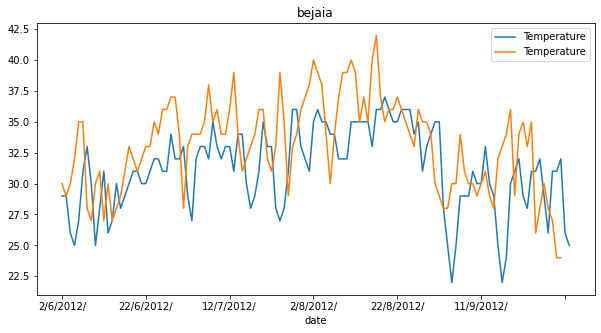

In [52]:
plt.subplots
df.iloc[:122,:].plot(x='date',y='Temperature',figsize=(10,5),ax=ax,title='bejaia')
df.iloc[123:,:].plot(x='date',y='Temperature',figsize=(10,5),ax=ax)

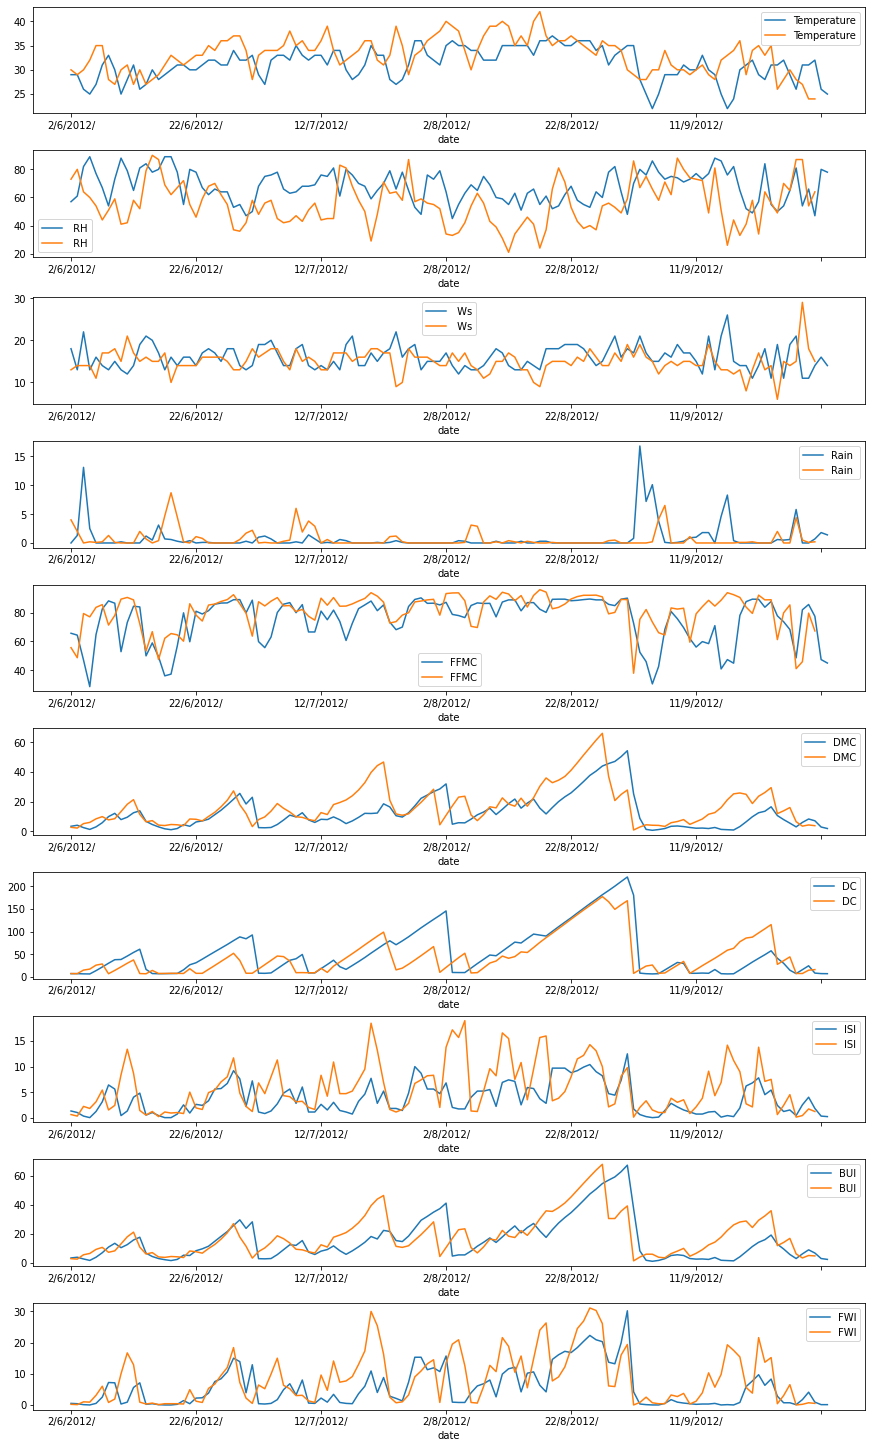

In [60]:
count=0
fig,ax=plt.subplots(10,figsize=(12,20),constrained_layout=True)
for i in df.columns[:-2]:
    df.iloc[:122,:].plot(x='date',y=i,ax=ax[count])
    df.iloc[123:,:].plot(x='date',y=i,ax=ax[count])
    count+=1

In [ ]:
IN the given dataset there are two regions bejaia and sibi.blue line features is showing for bejaia and orange line features is 
showing for sibbi.

# DATA PREPROCESSING
BUI,FWI,DC,DMC,Rain,FFMC,ISI

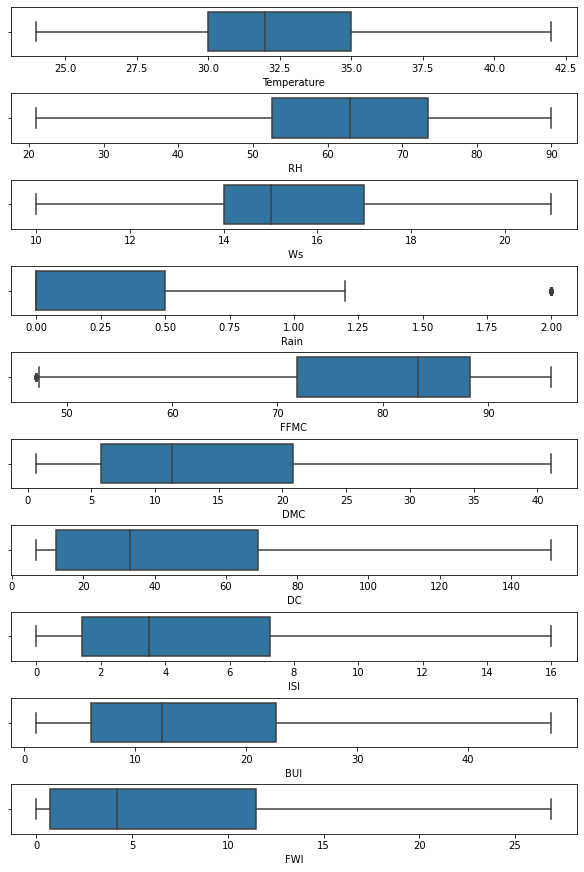

In [27]:
count=0
fig,ax=plt.subplots(10,figsize=(8,12),constrained_layout=True)
for i in df.columns[:-2]:
    Q1=np.percentile(df[i],25)
    Q3=np.percentile(df[i],75)
    IQR=Q3-Q1
    lower_bound=Q1-IQR*1.5
    upper_bound=IQR*1.5+Q3
    df[i]=df[i].mask(df[i]<lower_bound,np.percentile(df[i],5))
    df[i]=df[i].mask(df[i]>upper_bound,np.percentile(df[i],90))
    sns.boxplot(data=df,x=i,ax=ax[count])
    count+=1

In [28]:
X=df.iloc[:,1:-1]
y=df[['Temperature']]
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Temperature   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3341.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):                   2.09e-245
Time:                        12:24:48   Log-Likelihood:                         -585.67
No. Observations:                 243   AIC:                                      1191.
Df Residuals:                     233   BIC:                                      1226.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
 RH            0.0550      0.015      3.600      0.000       0.025       0.085
 Ws           -0.0386      0.077     -0.502      0.616      -0.190       0.113
Rain           2.5953      0.321      8.096      0.000       1.964       3.227
FFMC           0.3712      0.016     22.560      0.000       0.339       0.404
DMC            0.1975      0.097      2.037      0.043       0.006       0.389
DC             0.0160      0.016      1.026      0.306      -0.015       0.047
ISI           -0.0642      0.209     -0.308      0.759      -0.475       0.347
BUI           -0.2500      0.113     -2.214      0.028      -0.472      -0.028
FWI            0.1984      0.131      1.516      0.131      -0.059       0.456
Classes       -2.4898      0.622     -4.003      0.000      -3.715      -1.265
==============================================================================
Omnibus:                        1.028   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                0.735
Skew:                           0.094   Prob(JB):                        0.692
Kurtosis:                       3.193   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Adjrsquare is  .993.So all features can used for training model. 

# Training AND EVALUATING Model for regression

In [29]:
X=df.iloc[:,1:-2]
Y=df.iloc[:,0]

# Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn.model_selection import cross_val_score
model=LinearRegression()
mse=cross_val_score(model,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)


-7.530827766021306


# RIDGE

In [33]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-7.443669501139392


# LASSO

In [34]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


C:\Users\Gunja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.0075519879576, tolerance: 0.2586829896907217
  positive)
C:\Users\Gunja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527.5281146367031, tolerance: 0.2518994845360825
  positive)
C:\Users\Gunja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.5845783765608, tolerance: 0.24522525773195877
  positive)
C:\Users\Gunja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

{'alpha': 1}
-7.3781482009155015


# DECISIONTREEREGRESSOR

In [35]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
params={'min_samples_split':range(2,10),
        'max_depth':range(2,10),
    'min_samples_leaf':range(1,5),
    'criterion':["friedman_mse", "mae",'mse']}
decision=GridSearchCV(DTR,params,cv=5,scoring='neg_mean_squared_error')
decision.fit(X,Y)
print(decision.best_params_)
print(decision.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 3}
-8.355063778812667


In [36]:
from sklearn.svm  import SVR
svr=SVR()
params={'kernel':['linear'],
       'gamma':[0.1,0.2,0.3,0.03],
       'C':range(1,10)}
gd=GridSearchCV(svr,params,scoring='neg_mean_squared_error')
gd.fit(X,Y)
print(gd.best_params_)
print(gd.best_score_)

{'C': 4, 'gamma': 0.1, 'kernel': 'linear'}
-8.166276304556156


# SVR

In [37]:
from sklearn.svm  import SVR
svr=SVR()
params={'kernel':['rbf'],
       'gamma':[0.1,0.2,0.3,0.03],
       'C':range(1,10)}
gd=GridSearchCV(svr,params,scoring='neg_mean_squared_error')
gd.fit(X,Y)
print(gd.best_params_)
print(gd.best_score_)

{'C': 5, 'gamma': 0.03, 'kernel': 'rbf'}
-9.905628503298349


# RANDOMFORESTREGESSOR

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
grid_search.fit(X,Y )
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.5min finished


{'bootstrap': True, 'max_depth': 100, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
-6.30594289146995


In [ ]:
Model              | negative square mean
---------------------------------------------
linear_Regression  | -7.530827766021306
------------------------------------------
SVR                | -9.905628503298349
------------------------------------------
RandomForest       |  -6.30594289146995
----------------------------------------
DecisionTree       | -8.355063778812667
----------------------------------------
Ridge Regression   | -7.443669501139392
-----------------------------------------
Lasso Regression   | -7.3781482009155015


Since rmse of randomforestregressor is less.So randomforest is best for this problem.

# Trainig model and Evaluating for Classifier

In [39]:
X_class=df.drop(columns=['Classes  ','date','Temperature'])
Y_class=df.iloc[:,10]

# LOGISTICREGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
params={'penalty':['l2'],
       'C':[1,20,40,50]}
searchcv=GridSearchCV(classifier,params,cv=5)
searchcv.fit(X_class,Y_class)
print(searchcv.best_params_)
print(searchcv.best_score_)

{'C': 1, 'penalty': 'l2'}
0.9755102040816326


# SVC

In [41]:
from sklearn.svm  import SVC
svc=SVC()
params={'kernel':['linear'],
       'gamma':[0.1,0.2,0.3,0.03],
       'C':range(1,10)}
grid=GridSearchCV(svc,params,cv=5)
grid.fit(X_class,Y_class)
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.9713435374149659


# RANDOMFORESTCLASSIFIER

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200,300,400]
}

RFC= RandomForestClassifier()
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_class, Y_class)
grid_search.best_params_
grid_search.best_score_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.9min finished


0.9836734693877551

# DECISIONTREECLASSIFIER

In [43]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
params={'min_samples_split':range(2,10),
        'max_depth':range(2,10),
    'min_samples_leaf':range(1,5),
    'criterion':["gini",'entropy']}
decision_tree=GridSearchCV(DTC,params,cv=5)
decision_tree.fit(X_class,Y_class)
print(decision_tree.best_params_)
print(decision_tree.best_score_)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9836734693877551


# NAIVEBAYES

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
val=cross_val_score(classifier,X_class,Y_class,scoring='accuracy',cv=5,)
val.mean()

0.9343537414965987

In [ ]:
Model                 |     Accuracy      |
------------------------------------------|
LogisticRegression    | 0.9755102040816326|
------------------------------------------|      
SVC                   | 0.9713435374149659|
------------------------------------------|
GaussianNB            | 0.9343537414965987|
------------------------------------------|
RandomCassifier       | 0.9836734693877551|
------------------------------------------|
DecisionTreeClassifier| 0.9343537414965987|

Since accuracy of randomforestclassifier is highest.So randomforestclassifier is good for this classification problem. 
             